In [1]:
# Initialization
from warnings import filterwarnings
filterwarnings('ignore')

## Hands-on 3A
### Regression
#### Build a regression model to estimate the weight based on height

In [2]:
from pandas import read_csv, get_dummies
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

df = read_csv('heights_weights_genders.csv')
X1 = df.values[:, 0].reshape(-1, 1)
y1 = df.values[:, 1]
X1_train, X1_test, y1_train, y1_test = split(X1, y1, random_state=42)

To do: 
- Build a linear regression model (name it as lnr1) to estimate weight using height
- Evaluate the model's performance with R2 score

In [3]:
lnr1 = LinearRegression().fit(X1_train, y1_train)
print(f'lnr1 score: {lnr1.score(X1_test, y1_test)}')

lnr1 score: 0.8573115456970967


Ask user to provide the height to predict the weight

In [4]:
h = eval(input('Enter height: '))
print(f'Estimated weight is: {lnr1.predict([[h]])}kg')

Enter height: 175
Estimated weight is: [82.03843622]kg


To do: 
- Build another regression model (lnr2) to estimate the weight based on height and gender
- Ask user to provide height and gender to predict the weight

In [10]:
df1 = get_dummies(df, drop_first=True)
y2 = df1['Weight(kg)'].values
del df1['Weight(kg)']
X2 = df1.values

X2_train, X2_test, y2_train, y2_test = split(X2, y2, random_state=42)
lnr2 = LinearRegression().fit(X2_train, y2_train)
print(f'lnr2 score: {lnr2.score(X2_test, y2_test)}')

lnr2 score: 0.9026663813060709


In [12]:
h = eval(input('Enter height: '))
g = eval(input('Enter gender (0 for female, 1 for male): '))
print(f'Estimated weight is: {lnr2.predict([[h, g]])}kg')

Enter height: 175
Enter gender (0 for female, 1 for male): 1
Estimated weight is: [84.45653817]kg


## Hands-on 3B 
### Classification
#### Build 3 classification models for breast cancer detection

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
feature_names = cancer.feature_names
target_names = cancer.target_names
X = cancer.data
y = cancer.target

To do: Check the number of features in the dataset

In [15]:
print(f'Number of features: {X.shape[1]}')

Number of features: 30


To do: Evaluate the performance of k-Nearest Neighbors, Logistic Regression and Decision Tree on this dataset using 5-fold cross validation.

In [17]:
# Use spot-checking to evaluate the model performance
models = []
models.append(('lgr', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier(random_state=42)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for n, m in models:
    scores = cross_val_score(m, X, y, cv=kf, n_jobs=-1)
    print(f'{n} accuracy: {scores.mean():.3%}, stdev: {scores.std():.3f}')

lgr accuracy: 94.197%, stdev: 0.030
knn accuracy: 93.669%, stdev: 0.028
dtc accuracy: 93.322%, stdev: 0.016


To do: Use Univariate Selection to select 10 best features. Evaluate the performance of k-Nearest Neighbors, Logistic Regression and Decision Tree on these features using 5-fold cross validation.

In [19]:
fs = SelectKBest(k=10)
Xs = fs.fit_transform(X, y)
print(f'{Xs.shape}')

for n, m in models:
    scores = cross_val_score(m, Xs, y, cv=kf, n_jobs=-1)
    print(f'With feature selection, {n} accuracy: {scores.mean():.3%}, stdev: {scores.std():.3f}')

(569, 10)
With feature selection, lgr accuracy: 93.844%, stdev: 0.034
With feature selection, knn accuracy: 92.967%, stdev: 0.028
With feature selection, dtc accuracy: 92.265%, stdev: 0.013


To do: Use Principle Component Analysis (PCA) to reduce the dimensionality of the original features to 10. Evaluate the performance of k-Nearest Neighbors, Logistic Regression and Decision Tree on these features using 5-fold cross validation.

In [20]:
dr = PCA(n_components=10)
Xd = dr.fit_transform(X)
print(f'{Xd.shape}')

for n, m in models:
    scores = cross_val_score(m, Xd, y, cv=kf, n_jobs=-1)
    print(f'With dimensionalty reduction, {n} accuracy: {scores.mean():.3%}, stdev: {scores.std():.3f}')

(569, 10)
With dimensionalty reduction, lgr accuracy: 95.426%, stdev: 0.015
With dimensionalty reduction, knn accuracy: 93.669%, stdev: 0.028
With dimensionalty reduction, dtc accuracy: 91.390%, stdev: 0.034


## Hands-on 3C
### Clustering
#### Construct a model to group the truck drivers

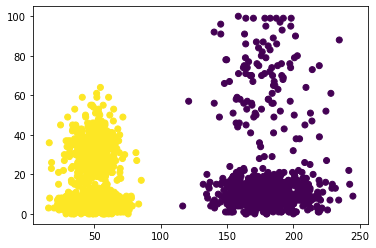

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read dataset
df = pd.read_csv('drivers.csv', sep='\t', header=0)

# Store features (Column 1 & 2)
X = df.iloc[:, 1:].values

# Apply k-mean clustering with 2 clusters
km = KMeans(n_clusters=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.show()

To do: To group the truck drivers into 4 clusters and label the data samples according to their cluster

To do: Add labels to df and save it as a CSV file